In [161]:
import pandas as pd
import plotly.express as px

# How has the representation of women in movies shifted over the years (and across different genres)? 

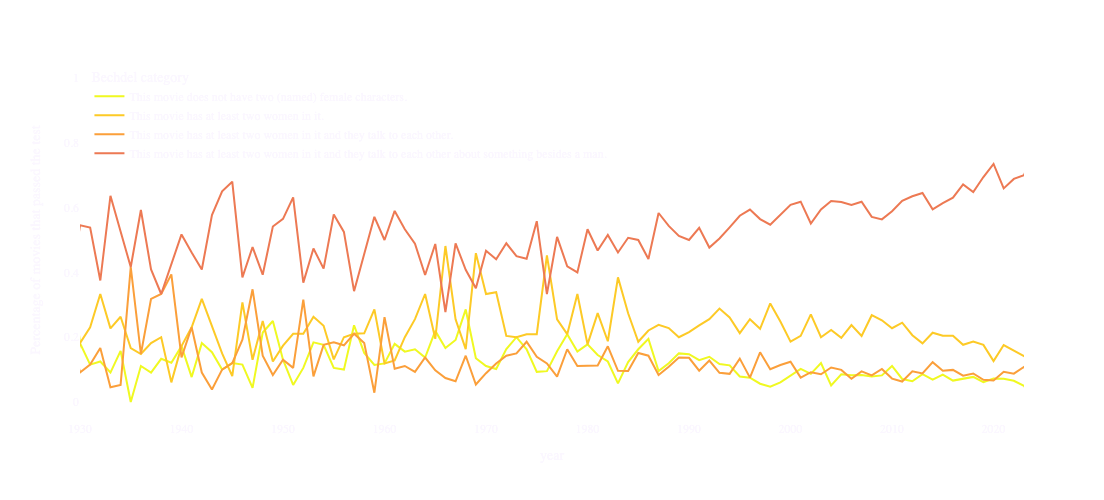

In [202]:
df = pd.read_csv("data_viz/movies_bechdel_aggr_year_pivot.csv")
df = df.rename(columns={"BECHDEL_PASS_PERC": "Percentage of movies that passed the test", 
                   "BECHDEL_CATEGORY": "Bechdel category"})
fig = px.line(df, x="year", y="Percentage of movies that passed the test", 
              color='Bechdel category', color_discrete_sequence= px.colors.sequential.Plasma_r)

fig.update_layout(xaxis_range=[1930,2023], 
                 width=700, 
                 height=500)
fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
}, 
                  font_family="Source Sans Pro",
    font_color="#fbf7ff",
                 )

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()
fig.write_html("data_viz/viz1.html")


# How has the budget and profit of movies changed over the years and across genres?

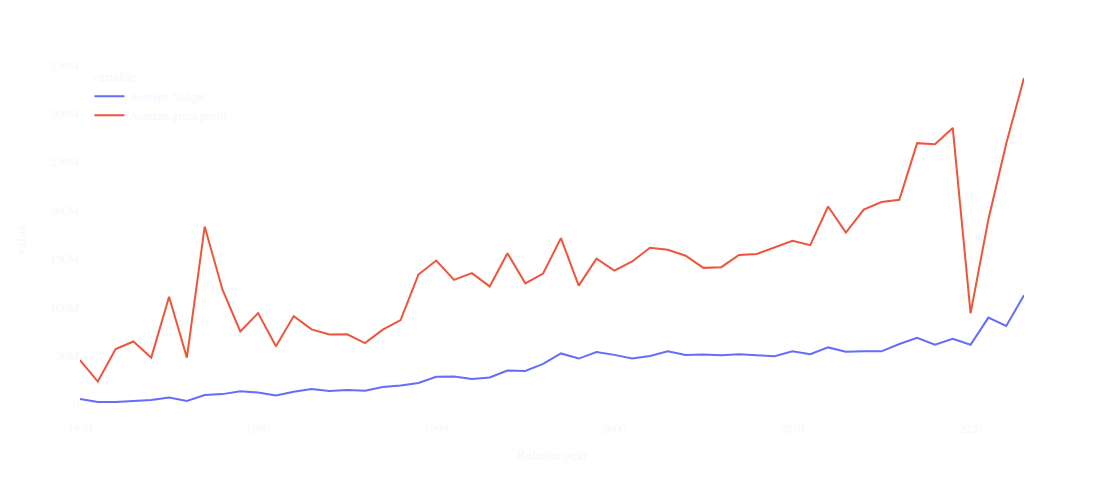

In [203]:
df = pd.read_csv("data_viz/all_movies_aggr_budget_gross_year.csv")
df = df.rename(columns={"AVG_BUDGET": "Average budget", 
                        "AVG_GROSS": "Average gross profit", 
                       "RELEASE_YEAR": "Release year"})
fig = px.line(df, x="Release year", y=["Average budget", "Average gross profit"])

fig.update_layout(xaxis_range=[1970,2023], 
                 width=700, 
                 height=500)
fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
}, 
                  font_family="Source Sans Pro",
    font_color="#fbf7ff",
                 )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_html("data_viz/viz2.html")


# How does the representation of women differ per movie genre? 

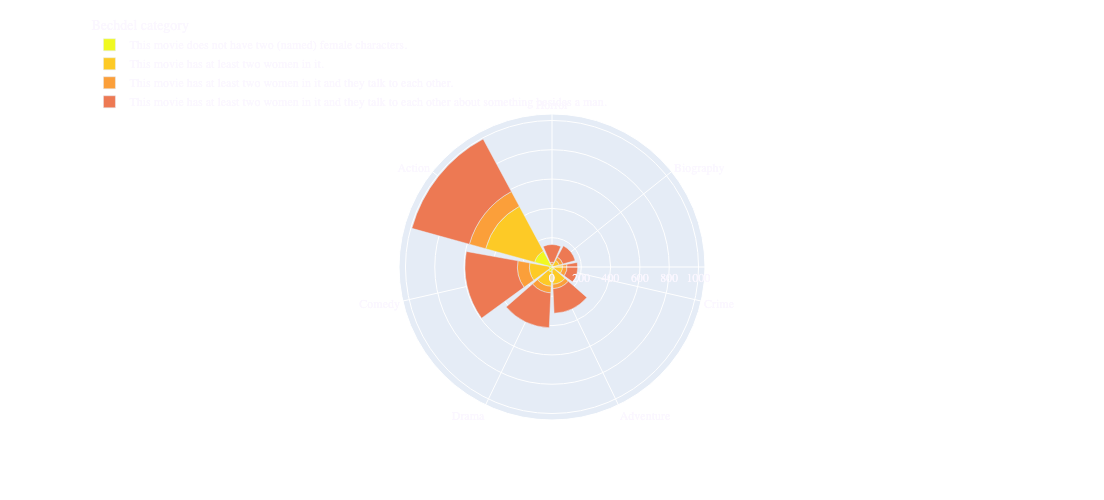

In [194]:
df = pd.read_csv('data_viz/bechdel_movies_aggr_genre_pivot.csv')
df = df.rename(columns={"BECHDEL_PASS": "Number of movies that passed the test", 
                        "FIRST_GENRE": "Movie genre", 
                       "BECHDEL_CATEGORY": "Bechdel category", 
                       "TOTAL_MOVIES": "Total number of movies in this genre"})

fig = px.bar_polar(df.tail(28), r="Number of movies that passed the test", theta="Movie genre",
                   color="Bechdel category", hover_data=['Total number of movies in this genre'],
                   color_discrete_sequence= px.colors.sequential.Plasma_r)

fig.update_layout(width=800, 
                 height=500)
fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
}, 
                  font_family="Source Sans Pro",
    font_color="#fbf7ff",
                 )

fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

fig.write_html("data_viz/viz3.html")


# Which popular movies have not been rated in the Bechdel test yet? 

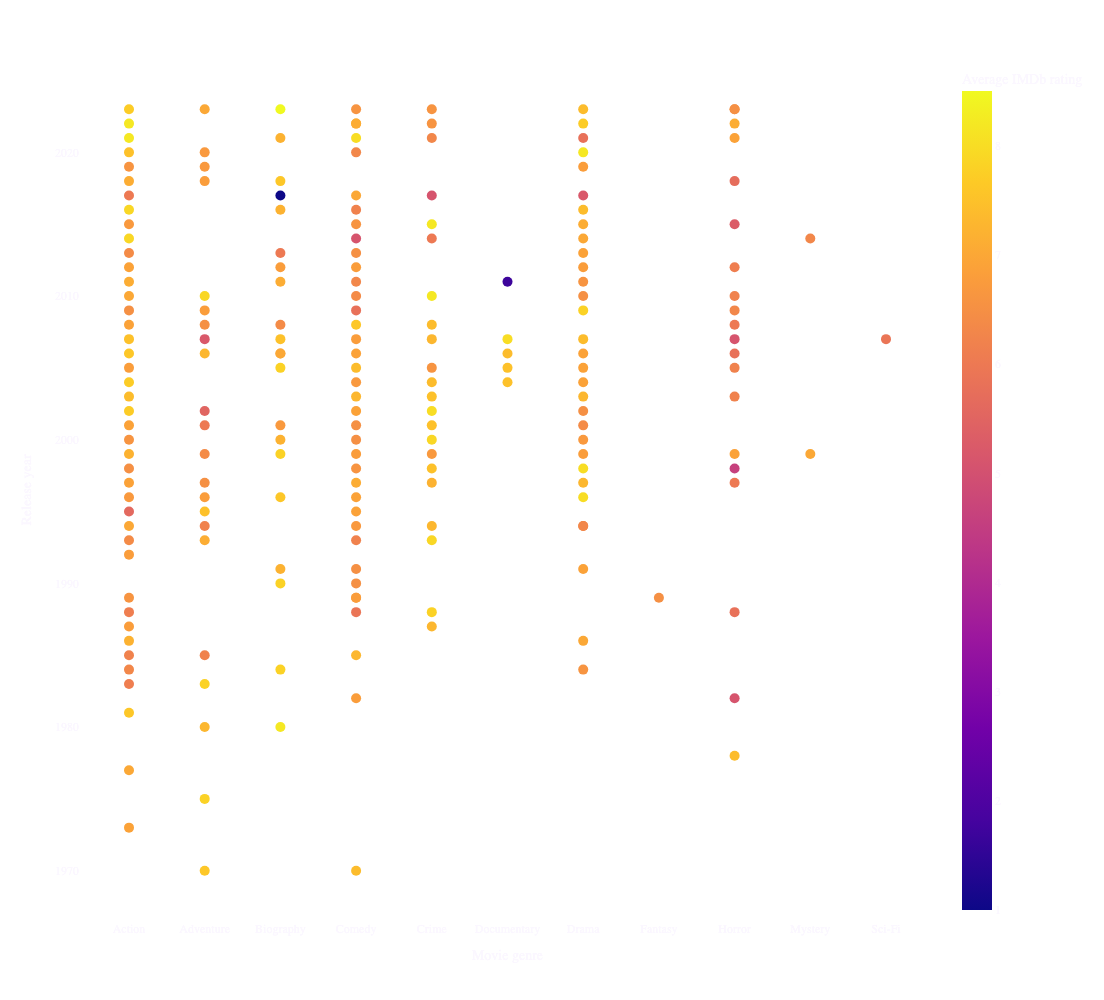

In [195]:
df = pd.read_csv('data_viz/top_movies_without_bechdel.csv')
df = df.rename(columns={"IMDB_AVG_RATING": "Average IMDb rating", 
                        "FIRST_GENRE": "Movie genre", 
                        "ORIGINAL_TITLE": "Title", 
                        "IMDB_ID": "IMDb ID",
                        "RELEASE_YEAR": "Release year" })
fig = px.scatter(df, x="Movie genre", y="Release year", color="Average IMDb rating",
                  hover_data=['Title', 'IMDb ID'])

fig.update_traces(marker={'size': 10})

fig.update_layout(width=700, 
                 height=1000)
fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
}, 
                  font_family="Source Sans Pro",
    font_color="#fbf7ff",
                 )

fig.show()
fig.write_html("data_viz/viz4.html")


# How does my own taste of music compare to the highest rated IMDb movies in terms of rating and bechdel test? 

In [196]:
df = pd.read_csv('data_viz/bechdel_movies_aggr_genre_pivot.csv')

df = df.sort_values(by=['FIRST_GENRE', 'BECHDEL_CATEGORY'])

data=[]
for genre in df['FIRST_GENRE'].unique():
    data.append(df.loc[df['FIRST_GENRE']==genre]['BECHDEL_PASS'].tolist())

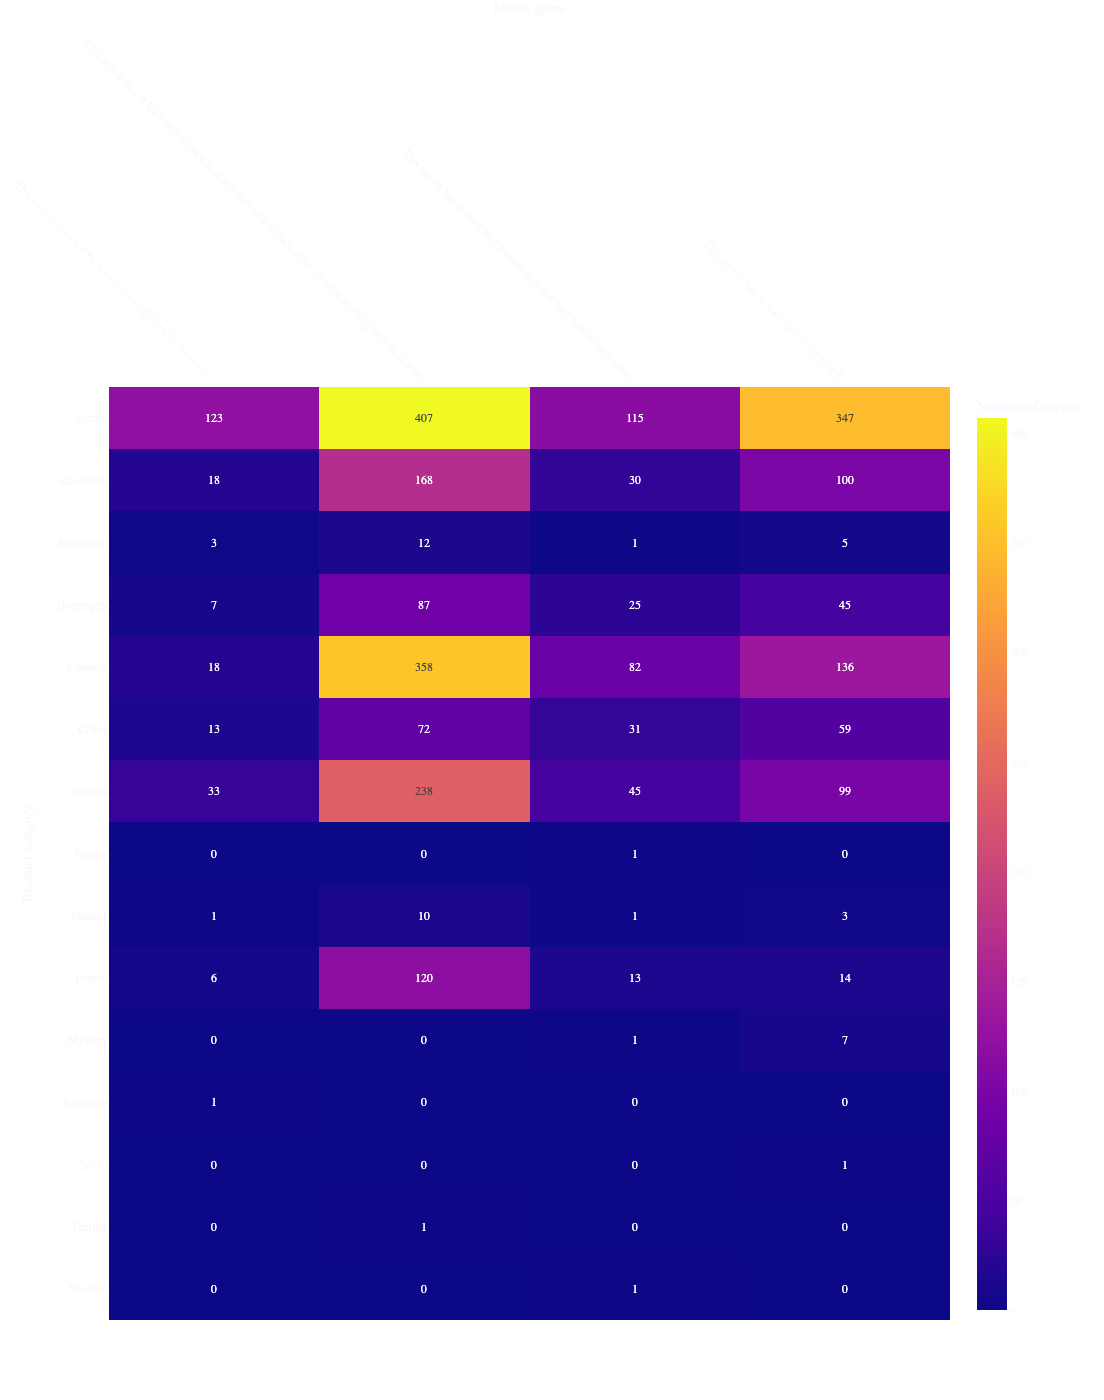

In [197]:
fig = px.imshow(data,
                labels=dict(x="Movie genre", y="Bechdel category", color="Number of movies"),
                x=df['BECHDEL_CATEGORY'].unique(),
                y=df['FIRST_GENRE'].unique(), 
                text_auto=True, aspect="auto")

fig.update_xaxes(side="top")

fig.update_layout(width=700, 
                 height=1400)

fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
}, 
                  font_family="Source Sans Pro",
    font_color="#fbf7ff",
                 )

fig.update_xaxes(tickangle=45)

fig.show()
fig.write_html("data_viz/viz5.html")


In [198]:
df = pd.read_csv('data_viz/alma_movies_aggr_genre_bechdelrating.csv')

df = df.sort_values(by=['FIRST_GENRE', 'BECHDEL_CATEGORY'])

data=[]
for genre in df['FIRST_GENRE'].unique():
    data.append(df.loc[df['FIRST_GENRE']==genre]['BECHDEL_PASS'].tolist())

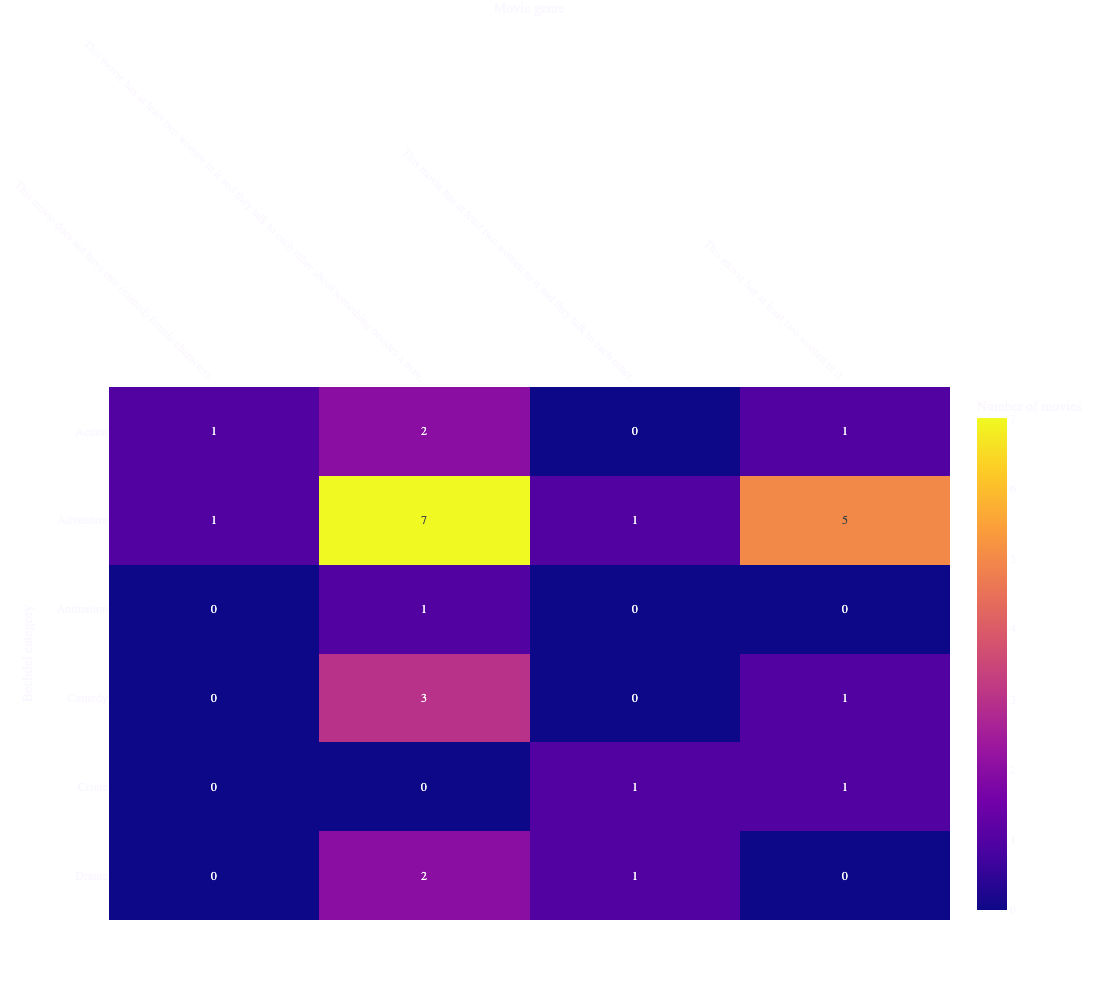

In [199]:
fig = px.imshow(data[0:6],
                labels=dict(x="Movie genre", y="Bechdel category", color="Number of movies"),
                x=df['BECHDEL_CATEGORY'].unique(),
                y=df['FIRST_GENRE'].unique()[0:6], 
                text_auto=True, aspect="auto")

fig.update_xaxes(side="top")

fig.update_layout(width=700, 
                 height=1000)

fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
}, 
                  font_family="Source Sans Pro",
    font_color="#fbf7ff",
                 )

fig.update_xaxes(tickangle=45)

fig.show()
fig.write_html("data_viz/viz6.html")
